In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


from datetime import datetime


What was the change in price of the stock overtime?

In [2]:
# Define the list of tech stocks
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Define the date range for the data
end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

# Download the stock data
stock_data = {stock: yf.download(stock, start, end) for stock in tech_list}


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [3]:
# Combine all data into a single DataFrame
df = pd.concat([data.assign(company_name=stock) for stock, data in stock_data.items()])

# Display the last 10 rows
print(df.tail(10))


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-05-03  186.990005  187.869995  185.419998  186.210007  186.210007   
2024-05-06  186.279999  188.750000  184.800003  188.699997  188.699997   
2024-05-07  188.919998  189.940002  187.309998  188.759995  188.759995   
2024-05-08  187.440002  188.429993  186.389999  188.000000  188.000000   
2024-05-09  188.880005  191.699997  187.440002  189.500000  189.500000   
2024-05-10  189.160004  189.889999  186.929993  187.479996  187.479996   
2024-05-13  188.000000  188.309998  185.360001  186.570007  186.570007   
2024-05-14  183.820007  187.720001  183.449997  187.070007  187.070007   
2024-05-15  185.970001  186.720001  182.729996  185.990005  185.990005   
2024-05-16  185.600006  187.309998  183.460007  183.630005  183.630005   

              Volume company_name  
Date                               
2024-05-03  39172000         AMZN  
202

In [4]:
# Display summary statistics for AAPL
print(stock_data['AAPL'].describe())

# Display general information about AAPL
print(stock_data['AAPL'].info())


              Open         High          Low        Close    Adj Close  \
count  1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean    132.965242   134.454605   131.578106   133.081563   131.411479   
std      43.001475    43.316816    42.673248    43.004189    43.307538   
min      43.860001    44.480000    42.567501    43.325001    41.812836   
25%     110.402500   112.154999   108.720001   110.209999   107.826817   
50%     143.460007   145.570007   141.899994   143.750000   142.039825   
75%     169.055000   170.629997   167.634995   168.880005   167.675804   
max     198.020004   199.619995   197.000000   198.110001   197.589523   

             Volume  
count  1.259000e+03  
mean   9.696082e+07  
std    5.182360e+07  
min    2.404830e+07  
25%    6.380945e+07  
50%    8.396200e+07  
75%    1.138995e+08  
max    4.265100e+08  
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2019-05-17 to 2024-05-16
Data columns (total 6 columns):
 #   Column

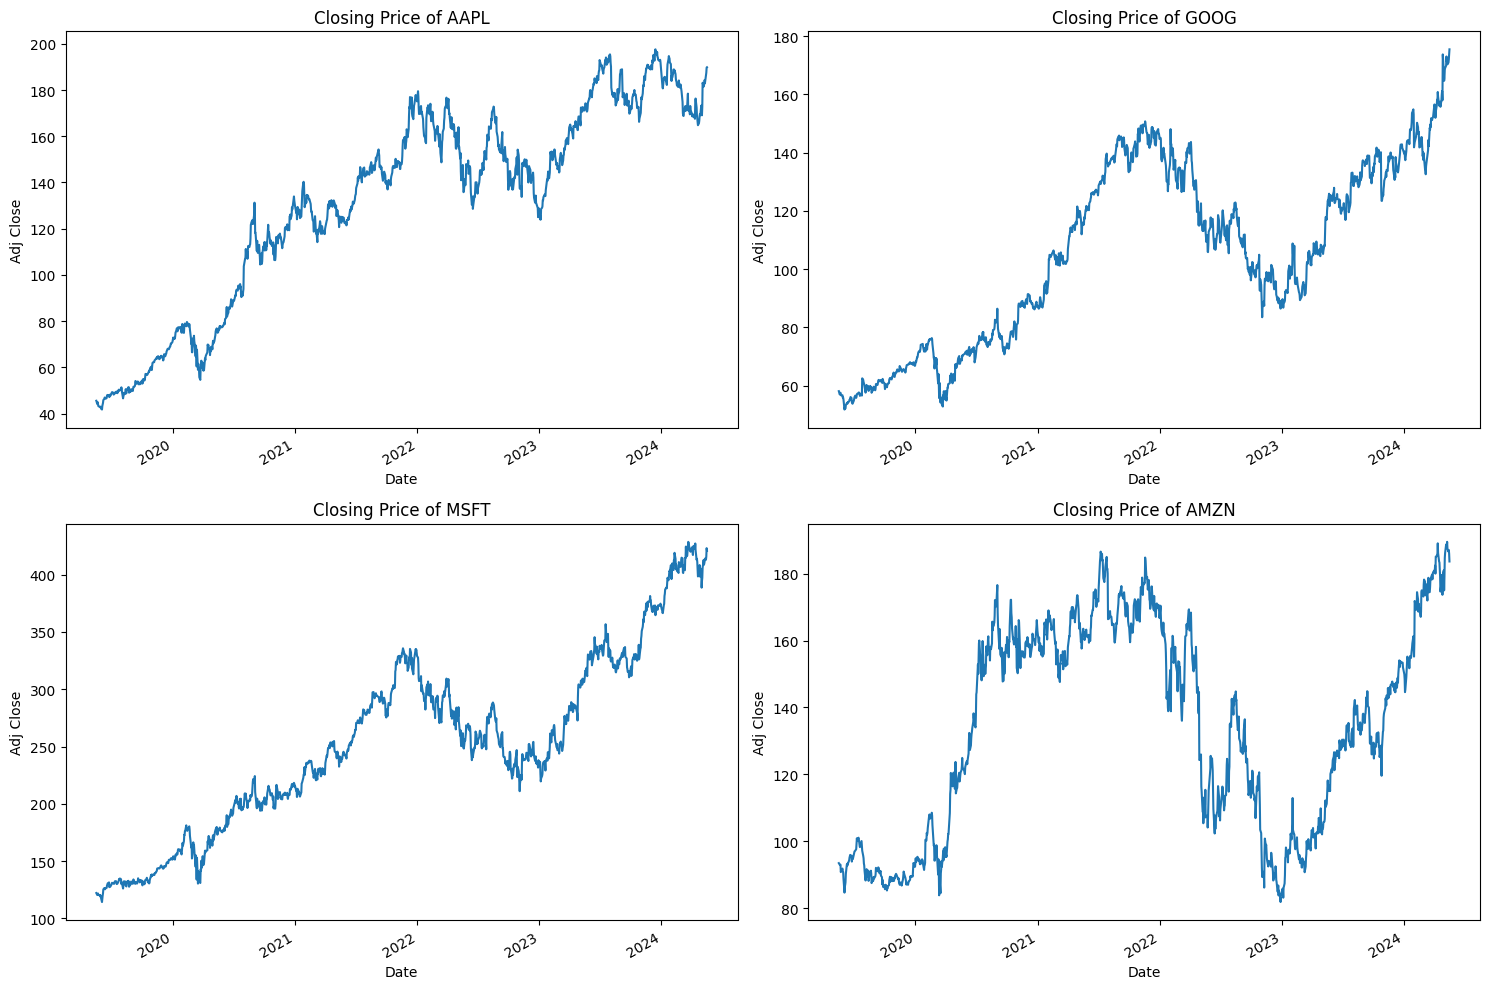

In [5]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (stock, data) in enumerate(stock_data.items(), 1):
    plt.subplot(2, 2, i)
    data['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.title(f"Closing Price of {stock}")

plt.tight_layout()
plt.show()


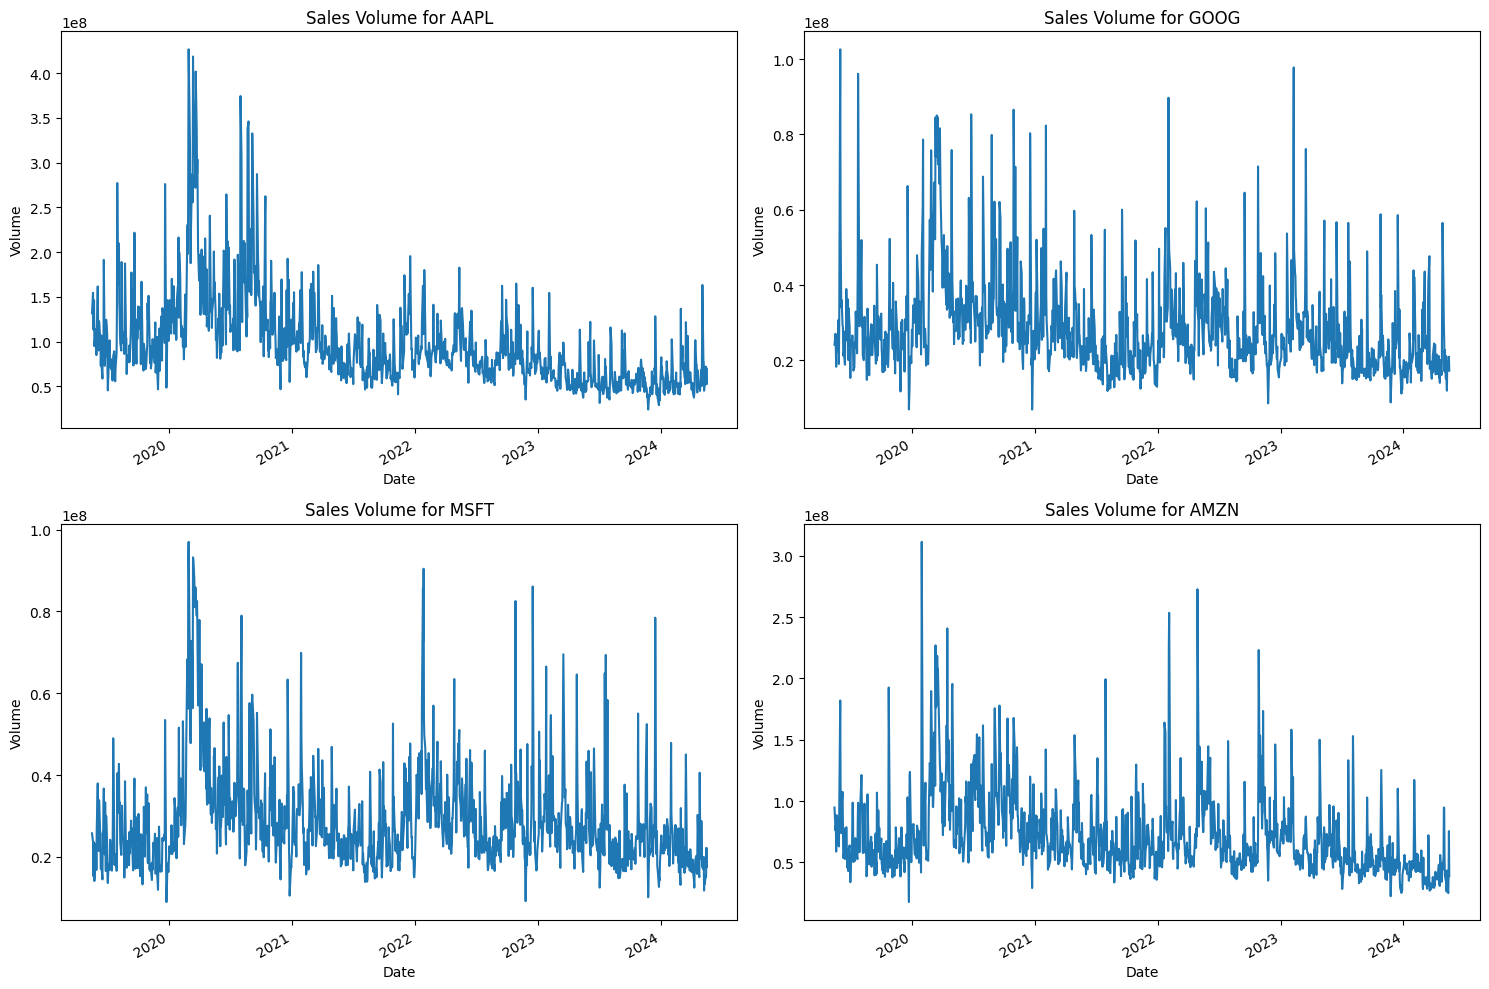

In [6]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (stock, data) in enumerate(stock_data.items(), 1):
    plt.subplot(2, 2, i)
    data['Volume'].plot()
    plt.ylabel('Volume')
    plt.title(f"Sales Volume for {stock}")

plt.tight_layout()
plt.show()


What was the moving average of the various stocks?


The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. The average is taken over a specific period of time, like 10 days, 20 minutes, 30 weeks, or any time period the trader chooses.

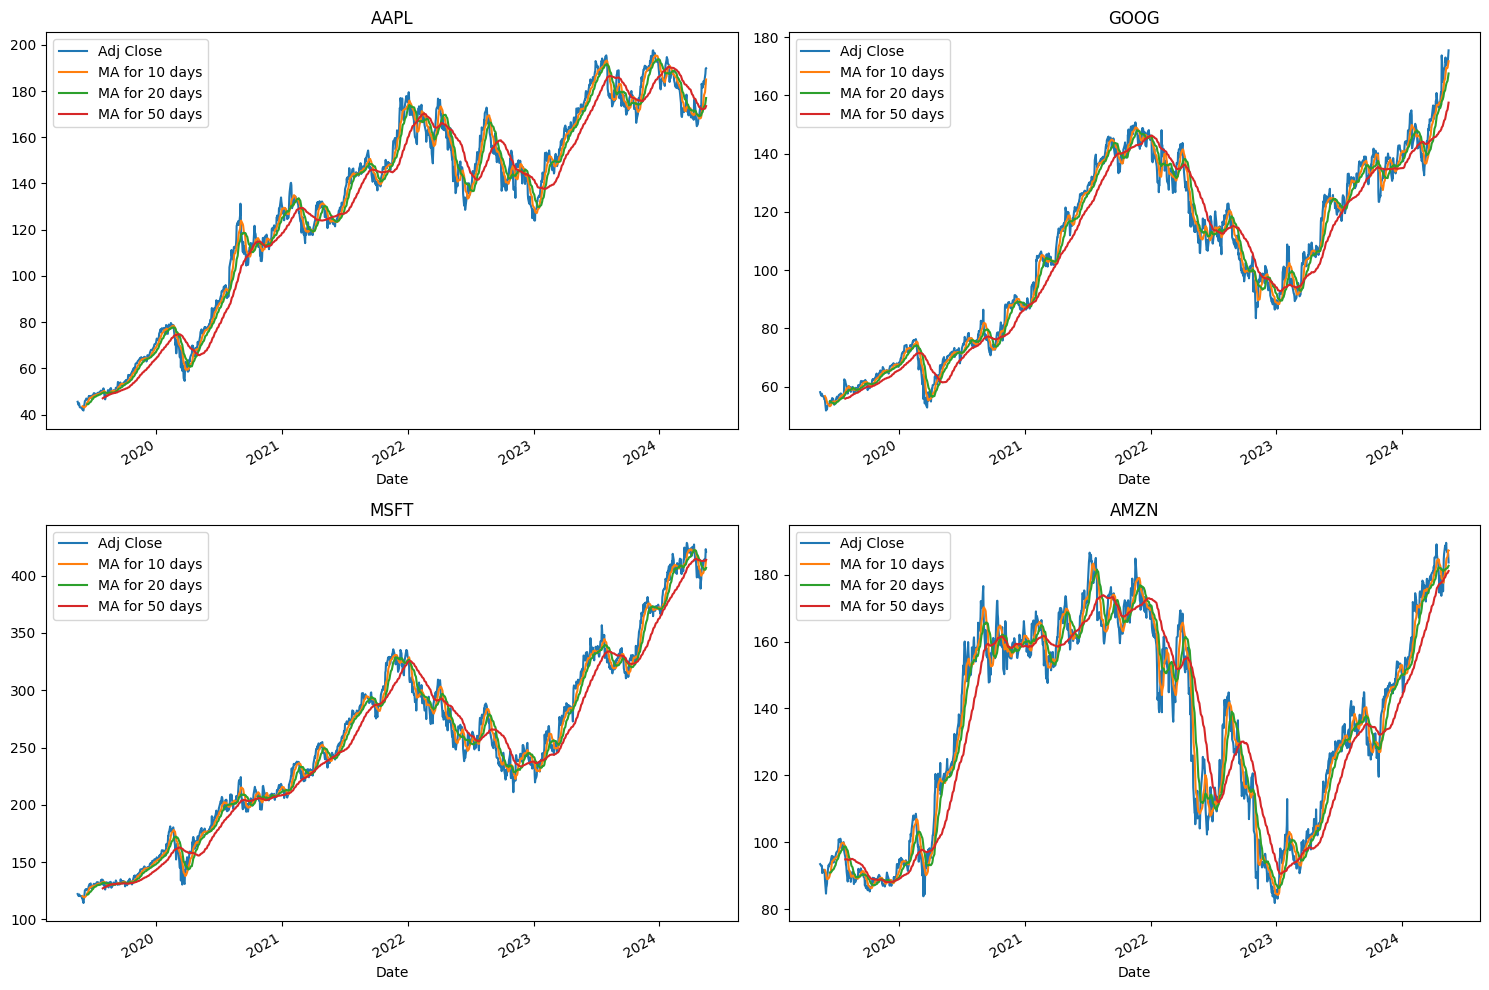

In [7]:
# Define moving average windows
ma_day = [10, 20, 50]

# Calculate moving averages
for stock, data in stock_data.items():
    for ma in ma_day:
        data[f"MA for {ma} days"] = data['Adj Close'].rolling(window=ma).mean()

# Plot moving averages
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for ax, (stock, data) in zip(axes.flatten(), stock_data.items()):
    data[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax)
    ax.set_title(stock)

plt.tight_layout()
plt.show()


We see in the graph that the best values to measure the moving average are 10 and 20 days because we still capture trends in the data without noise.

What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve the daily returns for the Apple stock.

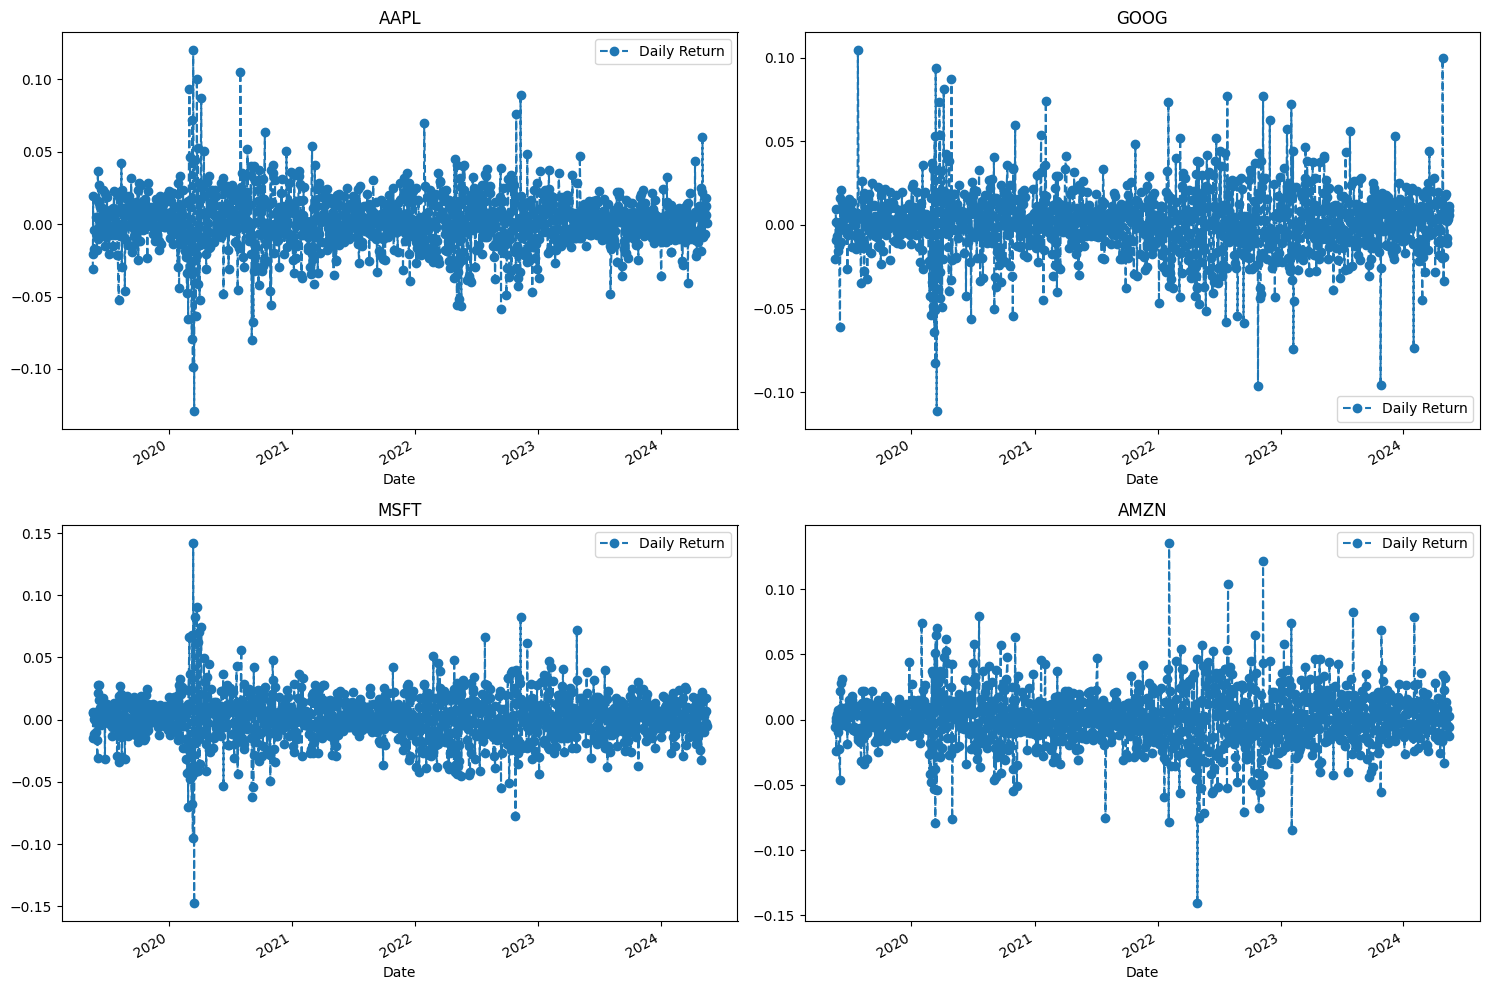

In [8]:
# Calculate daily returns
for stock, data in stock_data.items():
    data['Daily Return'] = data['Adj Close'].pct_change()

# Plot daily returns
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
for ax, (stock, data) in zip(axes.flatten(), stock_data.items()):
    data['Daily Return'].plot(ax=ax, legend=True, linestyle='--', marker='o')
    ax.set_title(stock)

plt.tight_layout()
plt.show()


What was the correlation between different stocks closing prices?


Correlation is a statistic that measures the degree to which two variables move in relation to each other which has a value that must fall between -1.0 and +1.0. Correlation measures association, but doesn’t show if x causes y or vice versa — or if the association is caused by a third factor[1].

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

[*********************100%%**********************]  4 of 4 completed


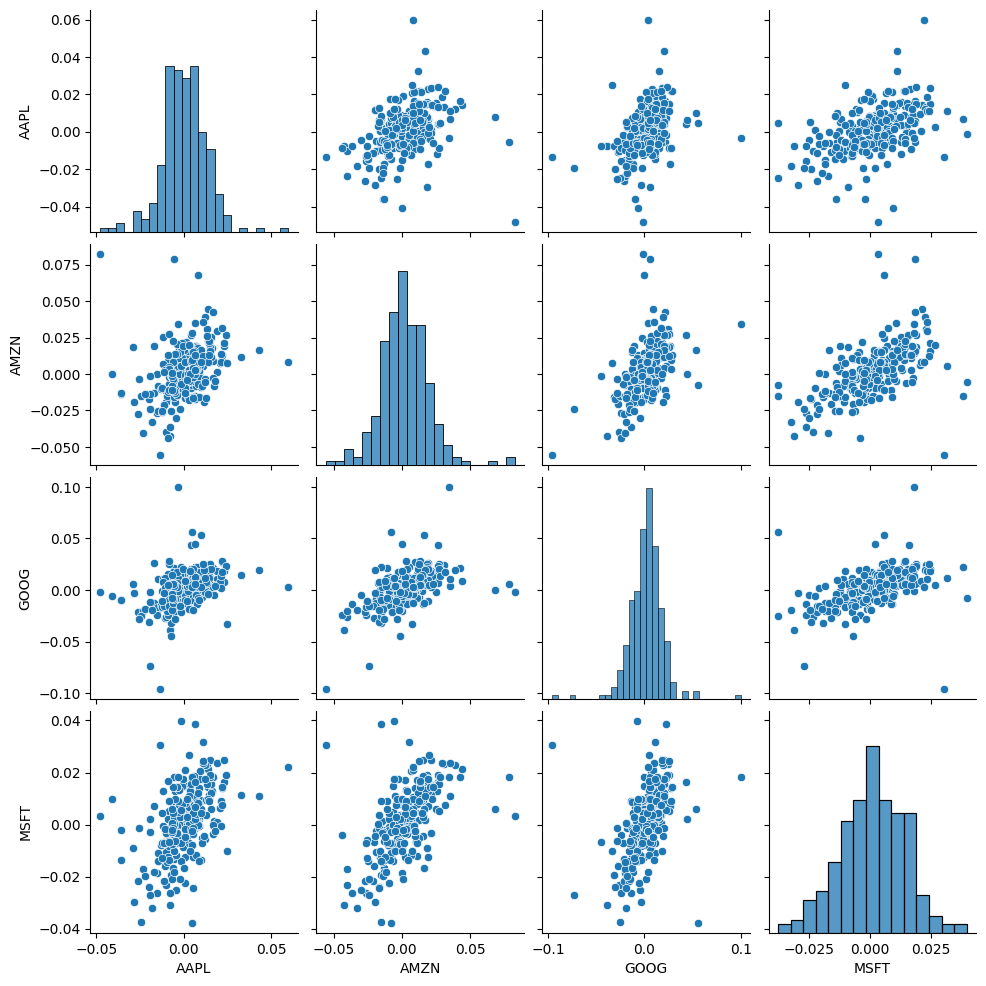

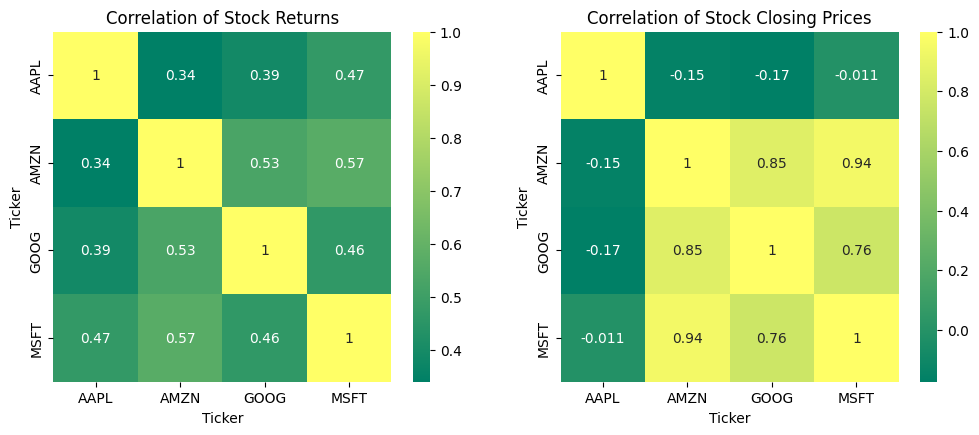

In [9]:


tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

data = yf.download(tech_list, start=start, end=end)['Adj Close']

# Calculate daily returns
tech_rets = data.pct_change()

# Plot pairplot for daily returns
sns.pairplot(tech_rets.dropna())
plt.show()

# Plot correlation heatmaps
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Returns')

plt.subplot(2, 2, 2)
sns.heatmap(data.corr(), annot=True, cmap='summer')
plt.title('Correlation of Stock Closing Prices')

plt.show()


In [10]:
tech_rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-05-17,NaN,NaN,NaN,NaN
2023-05-18,0.013666,0.022944,0.016793,0.014395
2023-05-19,0.000628,-0.016081,-0.002186,-0.000565
2023-05-22,-0.005481,-0.010667,0.021258,0.008921
2023-05-23,-0.015155,-0.000174,-0.020497,-0.018432


Predicting the closing price stock price using LSTM and RandomForestRegressor

An error occurred: 'NoneType' object has no attribute 'group'


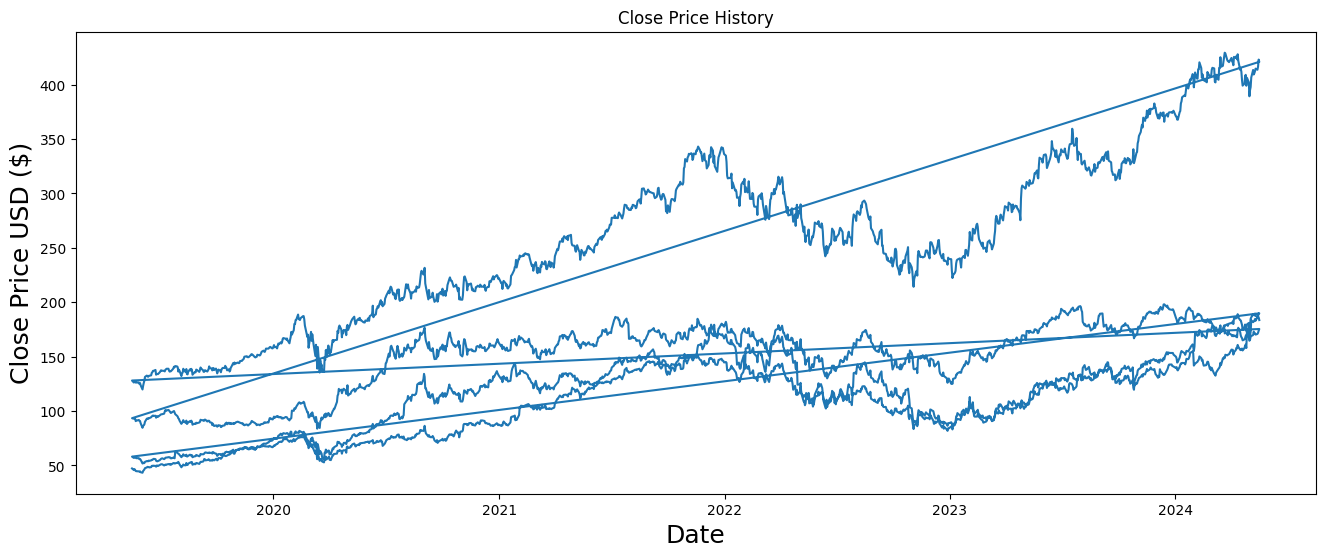

C:\Users\sgraj\OneDrive\Desktop\SSN\6th_sem\ML_Lab\ML_mini_project\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


4725/4725 ━━━━━━━━━━━━━━━━━━━━ 210s 43ms/step - loss: 0.0021
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 152ms/step
RMSE: 4.561117702137048


C:\Users\sgraj\AppData\Local\Temp\ipykernel_14332\1887303688.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


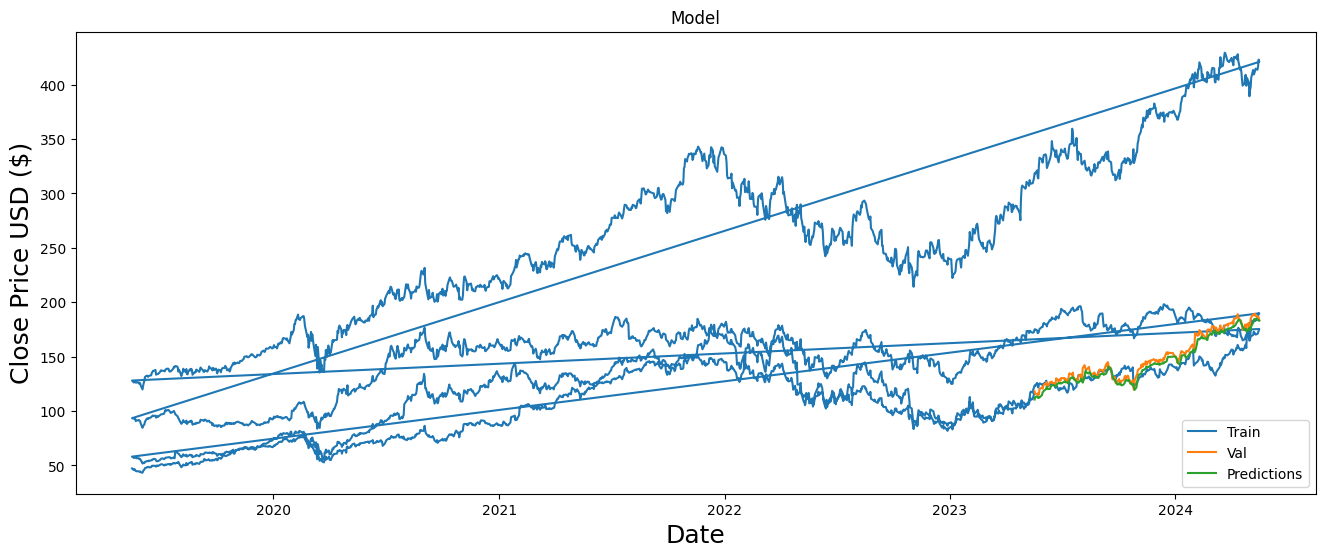

                 Close  Predictions
Date                               
2023-05-18  118.150002   110.589172
2023-05-19  116.250000   112.952881
2023-05-22  115.010002   113.375710
2023-05-23  114.989998   112.584213
2023-05-24  116.750000   111.958244
...                ...          ...
2024-05-10  187.479996   184.699554
2024-05-13  186.570007   184.136978
2024-05-14  187.070007   183.387695
2024-05-15  185.990005   183.388092
2024-05-16  183.630005   183.123947

[251 rows x 2 columns]


In [11]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.optimizers import Adam

try:
    # Get the stock quote
    df = pdr.get_data_yahoo("TSLA", start='2012-01-01', end=datetime.now())
    if df is None:
        raise ValueError("Failed to retrieve data from Yahoo Finance API.")
    
    # Continue with the rest of your code...
except Exception as e:
    print("An error occurred:", e)


plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model with a decreased learning rate
optimizer = Adam(learning_rate=0.001)  # Decrease the learning rate here
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60:, :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:", rmse)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)


In [12]:
#Mean Absolute Percentage Error
mape = np.mean(np.abs((predictions - y_test) / y_test)) * 100
print("MAPE:", mape)

# Calculate accuracy as (100 - MAPE)
accuracy = 100 - mape
print("Accuracy:", accuracy)

MAPE: 2.6009896696879498
Accuracy: 97.39901033031205


An error occurred: 'NoneType' object has no attribute 'group'


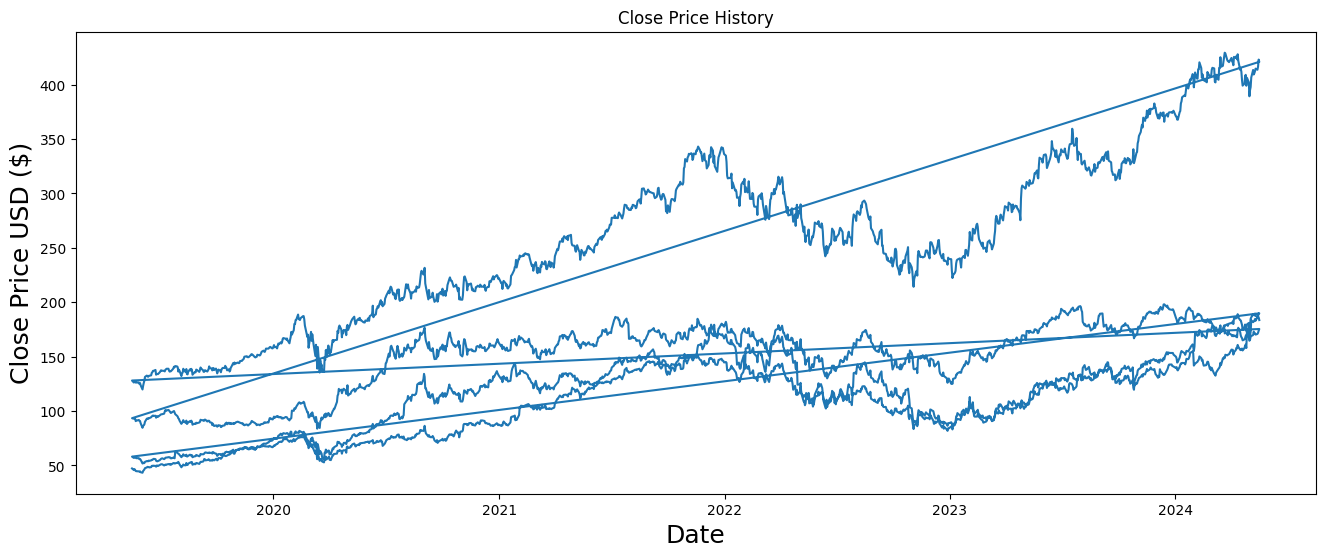

RMSE: 2.749119904161139


C:\Users\sgraj\AppData\Local\Temp\ipykernel_14332\1380510650.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


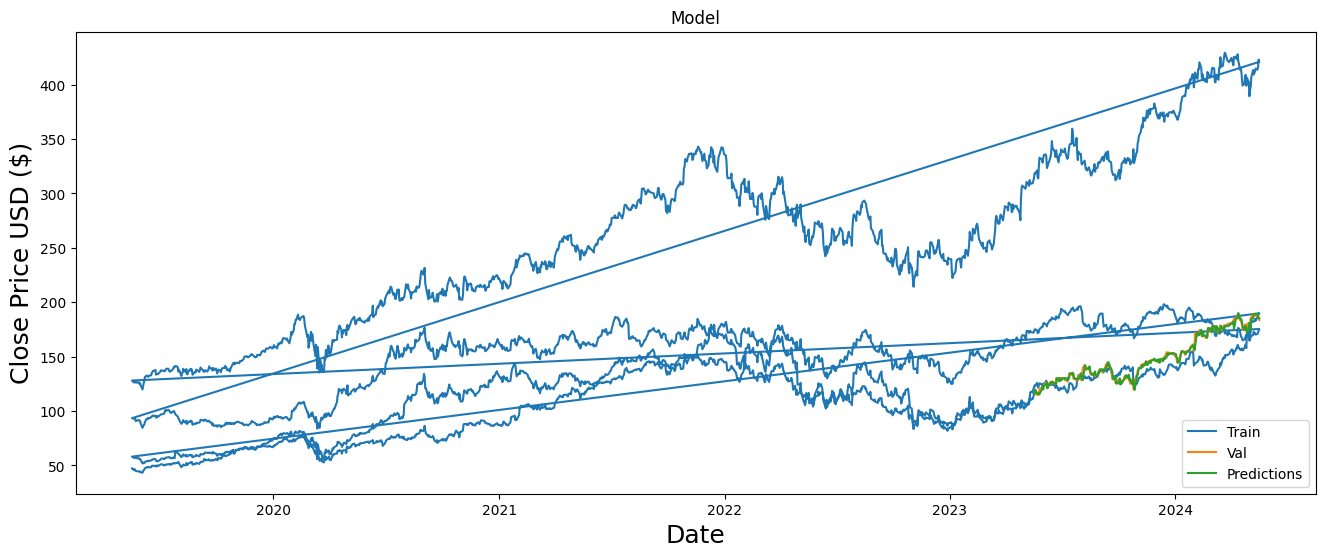

                 Close  Predictions
Date                               
2023-05-18  118.150002   115.934994
2023-05-19  116.250000   119.826983
2023-05-22  115.010002   116.470687
2023-05-23  114.989998   115.537569
2023-05-24  116.750000   115.571596
...                ...          ...
2024-05-10  187.479996   189.157686
2024-05-13  186.570007   189.354161
2024-05-14  187.070007   185.507651
2024-05-15  185.990005   185.855907
2024-05-16  183.630005   185.314470

[251 rows x 2 columns]


In [13]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

try:
    # Get the stock quote
    df = pdr.get_data_yahoo("TSLA", start='2012-01-01', end=datetime.now())
    if df is None:
        raise ValueError("Failed to retrieve data from Yahoo Finance API.")

    # Continue with the rest of your code...
except Exception as e:
    print("An error occurred:", e)

plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

# Create a new dataframe with only the 'Close' column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil(len(dataset) * .95 ))

# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

# Create the training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Tune the Random Forest Regressor model parameters
model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
model.fit(x_train, y_train)

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Get the root mean squared error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)

# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

# Show the valid and predicted prices
print(valid)


In [14]:
#Mean Absolute Percentage Error
mape = np.mean(np.abs((predictions - y_test) / y_test)) * 100
print("MAPE:", mape)

# Calculate accuracy as (100 - MAPE)
accuracy = 100 - mape
print("Accuracy:", accuracy)

MAPE: 1.395076244240937
Accuracy: 98.60492375575906
